## Statistical Analysis 6: Investigate the correlation between specific words and the overall band score.

## Approach
Since the data is highly imbalanced—due to the exclusion of scores below 4 and at 9 in the band_score—only the relative word frequencies within each score category can be considered and compared across classes.

Because the number of samples in a score category is somewhat correlated with the vocabulary size within that category, a direct comparison of raw frequencies is not meaningful.

Accordingly, we decided to compare word clouds for the individual score categories.

## Key findings
The word clouds clearly show that as the score increases, words like individual, government, example and instance play a more prominent role. It is also evident that word frequencies become more balanced with higher scores.

# Imports und Setup
---

In [5]:
import pandas as pd
import numpy as np
from os import path
import sys

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sys.path.append(path.dirname(path.abspath("")))
project_root = path.dirname(path.abspath(""))
print(project_root)

c:\Users\Sascha\Desktop\StudiumWin\4.Semester\NLP\Projekte\Team 10\team-10


In [2]:
pd.options.plotting.backend = "plotly"

# show the first 200 characters per attribute, None shows all
pd.set_option("max_colwidth", 100)

## Data Import
---

In [3]:
csv_file = "/data/clean_train.csv"
csv_file_path = project_root + csv_file
print(csv_file_path)

df = pd.read_csv(csv_file_path)
df.head(1)

c:\Users\Sascha\Desktop\StudiumWin\4.Semester\NLP\Projekte\Team 10\team-10/data/clean_train.csv


prompt  \
0  Interviews form the basic criteria for most large companies. However, some people think that the...   

                                                                                                 essay  \
0  It is believed by some experts that the traditional approach of recruiting candidates which is i...   

                                                                                            evaluation  \
0  **Task Achievement: [7]**\nThe essay effectively addresses the given task. The candidate clearly...   

                            band_score_old  \
0  7.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r   

                                                                          task_achievement_description  \
0  Task Achievement: [7]** The essay effectively addresses the given task. The candidate clearly st...   

   task_achievement_score  \
0                     7.0   

                                                                    coherence_and_cohesion_description  \
0  Coherence and Cohesion: [7.5]** The essay is well-organized and easy to follow. Transitions betw...   

   coherence_and_cohesion_score  \
0                           7.5   

                                                                          lexical_resource_description  \
0  Lexical Resource: [7]** The candidate demonstrates a good range of vocabulary. The majority of t...   

   lexical_resource_score  \
0                     7.0   

                                                            grammatical_range_and_accuracy_description  \
0  Grammatical Range and Accuracy: [7]** The essay exhibits a variety of sentence structures, inclu...   

   grammatical_range_and_accuracy_score  \
0                                   7.0   

                                                                        overall_band_score_description  \
0  Overall Band Score: [7.5]** The essay effectively addresses the given task, demonstrates good co...   

   band_score  
0         7.5

## Utility methods

---

This method plots word clouds for each provided score category.

In [7]:
class wordcloud_per_score:
    def __init__(self, text_score, stopwords=""):
        self.text_score = text_score
        self.stopwords = stopwords

        # Sortiertes Dictonary mit der anzahl der jeweiligen Scores
        work = np.array(text_score)
        vert = {}
        for score in work[:, 1][0]:
            if str(score) not in vert:
                vert[str(score)] = 1
        else:
            vert[str(score)] += 1

        self.sorted_dict = dict(sorted(vert.items()))

        # Texte nach Score zusammenführen
        keys = self.sorted_dict.keys()

        self.keys_list = list(self.sorted_dict.keys())
        self.essay_text_same_score = [None] * len(keys)

        for ind, k in enumerate(keys):
            self.essay_text_same_score[ind] = df[df["band_score"] == float(k)]["essay"]

        # stopword für wordcloud
        stopwords = stopwords.split(" ")
        STOPWORDS.update(stopwords)

    def change_stopwords(self, stopwords):
        stopwords = stopwords.split(" ")
        STOPWORDS.update(stopwords)

    def print_wordcloud(self):
        for ind in range(len(self.keys_list)):
            text = ""
            for s in self.essay_text_same_score[ind]:
                text += " " + s
            if(text != ""):
                wordcloud = WordCloud().generate(text)
                plt.imshow(wordcloud, interpolation="bilinear")
                print(f"Score: {self.keys_list[ind]}")
                plt.show()
        

            

## Stopwords

---

Certain words occurred with comparable frequency across all score categories and were thus excluded by incorporating them into the stopword list.

In [8]:
stopwords = "will many one people"

## Band Score
---
The band score distribution exhibits a pronounced imbalance, which considerably complicates the comparison of specific terms. This is due to the substantial variation in vocabulary size across groups formed by score categories.

In [9]:
df["band_score"].hist(bins=100)

In [11]:
band_score_essay = [(df["essay"], df["band_score"])]
band_score = wordcloud_per_score(band_score_essay, stopwords)

Score: 4.0


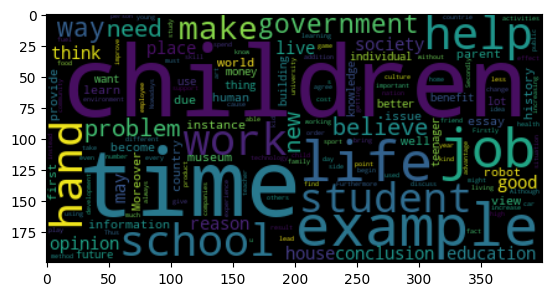

Score: 4.5


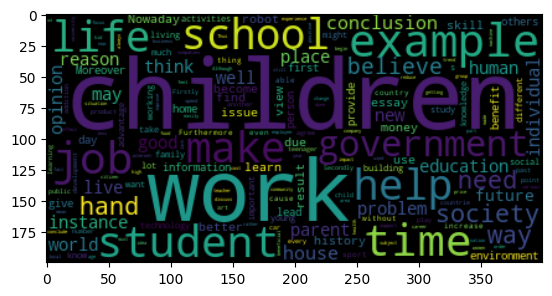

Score: 5.0


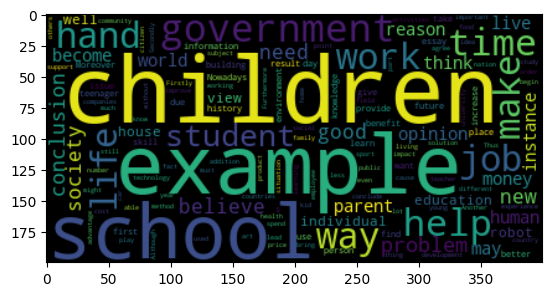

Score: 5.5


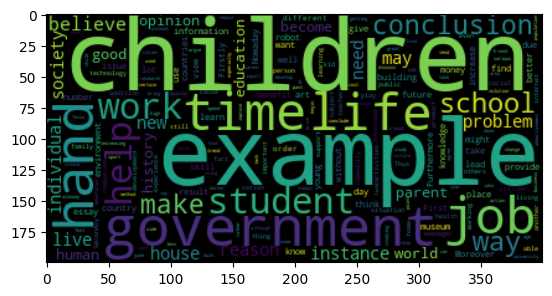

Score: 6.0


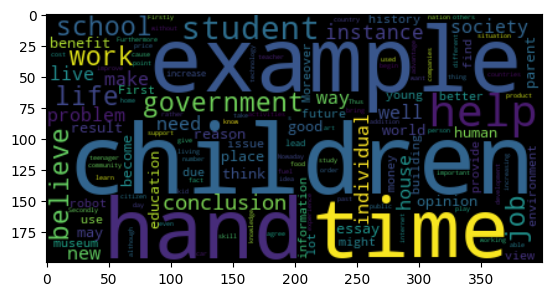

Score: 6.5


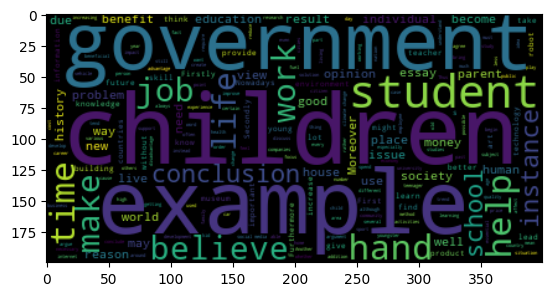

Score: 7.0


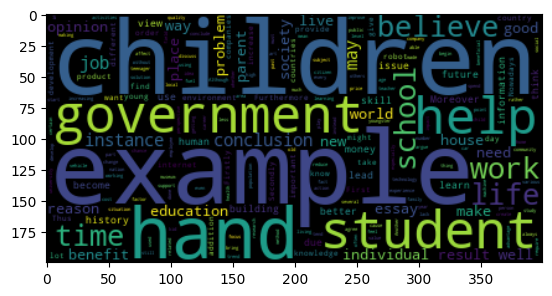

Score: 7.5


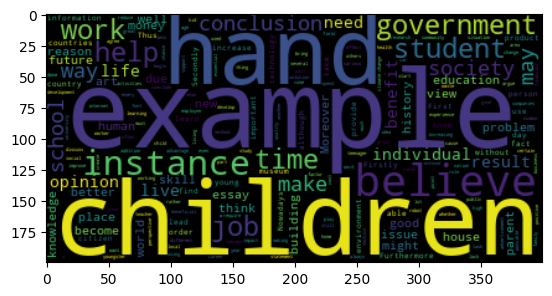

Score: 8.0


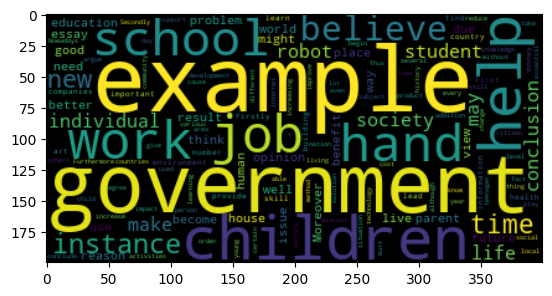

Score: 8.5


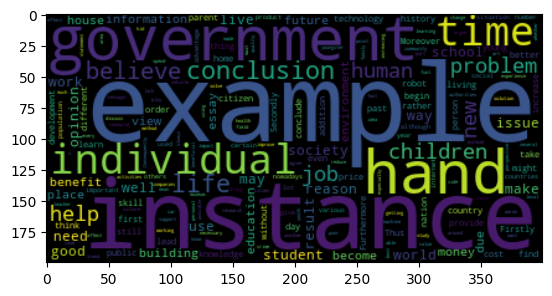

In [12]:
band_score.print_wordcloud()

## Tuple of Essay and Bandscore

---

In [13]:
list_score_essay = [(df["essay"], df["band_score"])]

In [14]:
work = np.array(list_score_essay)
work[:, 1]

print(f"Max: {np.max(work[:, 1])}")
print(f"Min: {np.min(work[:, 1])}")

vert = {}
for score in work[:, 1][0]:
    if str(score) not in vert:
        vert[str(score)] = 1
    else:
        vert[str(score)] += 1

vert

sorted_dict = dict(sorted(vert.items()))
print(sorted_dict)

Max: 8.5
Min: 4.0
{'4.0': 849, '4.5': 556, '5.0': 540, '5.5': 888, '6.0': 1375, '6.5': 1493, '7.0': 1315, '7.5': 1138, '8.0': 488, '8.5': 406}


In [15]:
keys = sorted_dict.keys()
keys_list = list(sorted_dict.keys())
essay_text_same_score = [None] * len(keys)

for ind, k in enumerate(keys):
    essay_text_same_score[ind] = df[df["band_score"] == float(k)]["essay"]

## Ergebnis:
---
An den Wordclouds ist deutlich zu erkennen, dass mit zusnehmendem Score Wörter wie individual und govermant un instance eine größere Rolle spielen. Auch ist erkenntlich das die frequenz der Wörter mit zunehmendem Score ausgeglichener werden.

## Comparison of the frequencies/relative frequencies of words used, grouped by score.
---
It becomes evident here that a direct comparison is not feasible due to the data imbalance. The vocabulary associated with each score differs significantly as a result of the unbalanced distribution.

Unfortunately, a proportional analysis is also inadequate, since the vocabulary size appears to be strongly correlated with the number of samples.

In [19]:
list_dict = []
for ind in range(len(keys_list)):
    text = ""
    for s in essay_text_same_score[ind]:
        text += " " + s

    print(f"Score: {keys_list[ind]}")

    text = (
        text.lower()
        .replace(".", " ")
        .replace("\n", " ")
        .replace("\r\\", " ")
        .split(" ")
    )

    dict_low = {}
    for word in text:
        if word not in dict_low:
            dict_low[word] = 1
        else:
            dict_low[word] += 1
    sorte = dict(sorted(dict_low.items(), key=lambda x: x[1]))
    list_dict.append(sorte)
    print(sorte)
    print("count of unique words: "+ str(len(sorte)))

Score: 4.0
{',applicant': 1, 'managerial': 1, 'cv': 1, 'submits': 1, 'manager': 1, 'overall,interviews': 1, 'crteria': 1, 'moer': 1, 'shalinging': 1, 'oner': 1, 'manger': 1, 'opericion': 1, 'haer': 1, 'experins': 1, 'injkdfzbvjkkjncjkxnvjknvjcnvjknxkjnf√jlnzlnhjsvbhbdzxhbvhb': 1, 'knkjzjnkjnkjnkjn;vb': 1, 'bzb': 1, 'nkn': 1, 'jbzhdfuzv': 1, 'nkckcjvziosfjguhiugvsnrinduhhisbdgjhzbvjzihiijuizhnzhuyhgjiohzjhujjkdjzhv∆jhv': 1, 'bj': 1, 'jvbhjfjzsndfnjdhgutysuuahuwrhwyhesvhfy': 1, 'ufvnnhfgfhziuoijgsijgwhcizjxio∆∂gjhziuhuhiojgixjbhiuhdhioghziushhpgjihubaojpzosdjpihiugahisojgoivniuahgjsoihuhyeruaysyryyhaiofjvbhhhhfhhdsjdkjfaihiuhgauyhweiopajsdngkj78gzjh7fhgaiujkbznbusnbznkejsnvbzjnknfjnuszhfgvcvbnm,deurytcvhjhytfythjouygtf': 1, 'tested': 1, 'interviews,': 1, 'suitability': 1, 'instance:': 1, 'test,': 1, 'internship': 1, 'conference': 1, ',hearing': 1, ',hard': 1, 'organisations,': 1, 'questionnaire': 1, 'loop': 1, 'hr': 1, 'profile': 1, 'screening': 1, 'backgroup': 1, 'well-reputed': 1, 'hir

In [17]:
clean_dict = []

for dic in list_dict:
    temp_dic = {}
    for entry in dic.items():
        if entry[0] not in temp_dic and entry[1] == 1:
            temp_dic[entry[0]] = entry[1] / len(dic)

    temp_dic = dict(sorted(temp_dic.items(), key=lambda x: x[1]))
    clean_dict.append(temp_dic)

for x in clean_dict:
    print(x)

{',applicant': 7.28862973760933e-05, 'managerial': 7.28862973760933e-05, 'cv': 7.28862973760933e-05, 'submits': 7.28862973760933e-05, 'manager': 7.28862973760933e-05, 'overall,interviews': 7.28862973760933e-05, 'crteria': 7.28862973760933e-05, 'moer': 7.28862973760933e-05, 'shalinging': 7.28862973760933e-05, 'oner': 7.28862973760933e-05, 'manger': 7.28862973760933e-05, 'opericion': 7.28862973760933e-05, 'haer': 7.28862973760933e-05, 'experins': 7.28862973760933e-05, 'injkdfzbvjkkjncjkxnvjknvjcnvjknxkjnf√jlnzlnhjsvbhbdzxhbvhb': 7.28862973760933e-05, 'knkjzjnkjnkjnkjn;vb': 7.28862973760933e-05, 'bzb': 7.28862973760933e-05, 'nkn': 7.28862973760933e-05, 'jbzhdfuzv': 7.28862973760933e-05, 'nkckcjvziosfjguhiugvsnrinduhhisbdgjhzbvjzihiijuizhnzhuyhgjiohzjhujjkdjzhv∆jhv': 7.28862973760933e-05, 'bj': 7.28862973760933e-05, 'jvbhjfjzsndfnjdhgutysuuahuwrhwyhesvhfy': 7.28862973760933e-05, 'ufvnnhfgfhziuoijgsijgwhcizjxio∆∂gjhziuhuhiojgixjbhiuhdhioghziushhpgjihubaojpzosdjpihiugahisojgoivniuahgjsoihuhy

### [`Click here to go back to the Homepage`](../Homepage.md)